In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
4745,6116-RFVHN,Female,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.45,3414.65,No
6571,2188-SXWVT,Female,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Mailed check,55.00,1885.15,No
2694,2466-NEJOJ,Male,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.65,169.75,No
815,3196-NVXLZ,Female,0,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.60,2088.05,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.TotalCharges.dtype

dtype('O')

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Customer Churn Prediction')

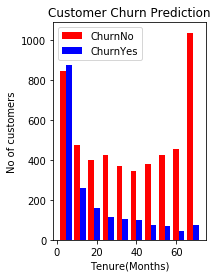

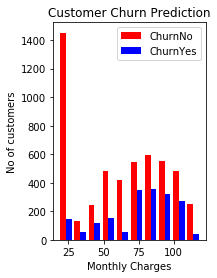

In [9]:
plt.figure(1)
plt.subplot(121)
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
plt.hist([tenure_churn_no,tenure_churn_yes], color=['red','blue'],label=['ChurnNo', 'ChurnYes'])
plt.legend()
plt.xlabel("Tenure(Months)")
plt.ylabel("No of customers")
plt.title('Customer Churn Prediction')
plt.figure(2)
plt.subplot(122)
tenure_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
plt.hist([tenure_churn_no,tenure_churn_yes], color=['red','blue'],label=['ChurnNo', 'ChurnYes'])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("No of customers")
plt.title('Customer Churn Prediction')



In [10]:
def print_column_values(df):
               for column in df:
                        if df[column].dtypes == 'object':
                                print(f'{column} : {df[column].unique()}')

In [11]:
print_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [12]:
df1.replace('No internet service', 'No' , inplace = True)
df1.replace('No phone service', 'No' , inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [13]:
print_column_values(df1)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService' ,'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [15]:
for i in yes_no_columns:
    df1[i].replace({'Yes':1 , 'No':0}, inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
 for column in df1:
        print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [17]:
df1['gender'].replace({'Male': 1 , 'Female':0},inplace = True)

In [18]:
 df2 =pd.get_dummies(data= df1 , columns=['InternetService','Contract','PaymentMethod'])

In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

df2[cols_to_scale] = Scaler.fit_transform(df2[cols_to_scale])

In [20]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
584,0,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6601,1,1,1,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
5056,0,0,1,1,1.000000,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
5610,0,0,0,0,0.028169,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1500,0,0,0,0,0.507042,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [21]:
X = df2.drop('Churn' ,  axis='columns')
Y = df2['Churn']

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2 ,random_state=5)
len(X_train)
len(X_test.columns)

26

In [23]:
from tensorflow import keras

In [24]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/fit/" , histogram_freq=1)
model = keras.Sequential([keras.layers.Dense(26 , input_shape=(26,) , activation = 'relu'),
                          keras.layers.Dense(100 ,activation = 'relu'),
                          keras.layers.Dense(20 , activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
                         ])
model.compile(optimizer='adam' , loss= 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train ,epochs=8,callbacks = [tb_callback])

Epoch 1/8
176/176 [==============================] - 1s 6ms/step - loss: 0.4647 - accuracy: 0.7751
Epoch 2/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.7986
Epoch 3/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8009
Epoch 4/8
176/176 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8043
Epoch 5/8
176/176 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8052
Epoch 6/8
176/176 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8073
Epoch 7/8
176/176 [==============================] - 1s 4ms/step - loss: 0.4006 - accuracy: 0.8087
Epoch 8/8
176/176 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8130


In [25]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7832


[0.44333404302597046, 0.783226728439331]

In [26]:
yp= model.predict(X_test)

In [27]:
y_predict =[]
for i in yp:
    if(i>=0.5):
        y_predict.append(1)
    else :
        y_predict.append(0)

     

In [28]:
len(y_predict)

1407

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(33.0, 0.5, 'Truth')

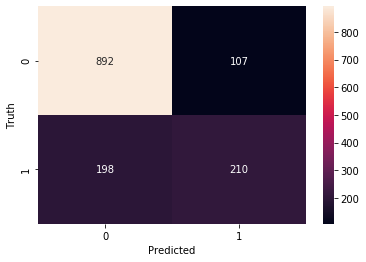

In [30]:
import seaborn as sm
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predict)

sm.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [31]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9840), started 11:29:55 ago. (Use '!kill 9840' to kill it.)